In [1]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns

In [2]:
font = {'size'   : 12}

matplotlib.rc('font', **font)

In [3]:
inc_knn_cont = pd.read_csv("../results_remote/FAST_KNN_NO_ObjIndex_ContObjIns.csv")
inc_knn_cont['creation_time'] = inc_knn_cont['creation_time'] * 0.5
ckqst = pd.read_csv("../results_remote/output_places_US_ckqst_preloaded.csv")

res = pd.concat([
    inc_knn_cont.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    ckqst.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']]
])

# res.loc[res["name"] == "FAST_KNN_NO_ObjIndex_objFreq", "creation_time"] = 1

name_map = {
    "FAST_KNN_NO_ObjIndex_ContObjIns": "Strat. 4 - Incremental w/ Obj Idx (on KNN. deg. ratio + AR threshold)",
    "ckqst_NO": "CkQST (Baseline)",
}
res['name'] = res['name'].apply(lambda x: name_map[x])
res = res[~(res['name'] == "Incremental")].sort_values(by=['name'])
# res = res[~(res['num_queries'] == 100000)]
res

,creation_time,search_time,num_queries,name
9,1.920268e+12,115126890807,5000000,CkQST (Baseline)
7,8.280999e+11,61518929619,2500000,CkQST (Baseline)
6,8.412745e+11,45486635922,2500000,CkQST (Baseline)
5,3.637003e+11,20409009241,1000000,CkQST (Baseline)
4,3.329124e+11,16928513812,1000000,CkQST (Baseline)
3,1.988368e+11,7079583874,500000,CkQST (Baseline)
2,2.125424e+11,8234837161,500000,CkQST (Baseline)
1,4.429443e+10,1732339317,100000,CkQST (Baseline)
0,4.226552e+10,1588430430,100000,CkQST (Baseline)
8,1.830430e+12,105621108701,5000000,CkQST (Baseline)


/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

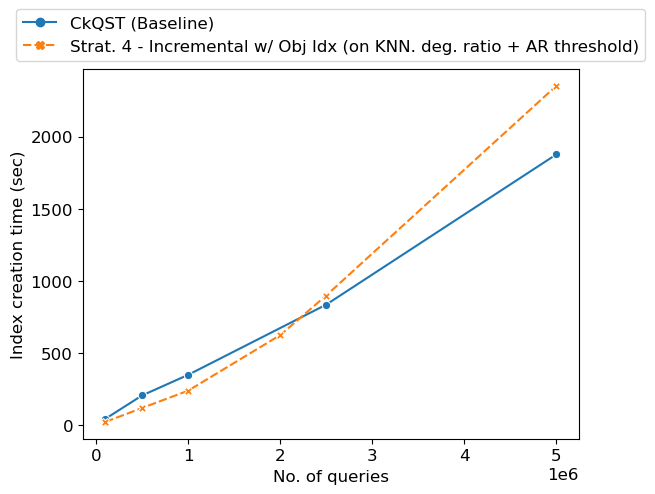

In [4]:
search_res = res.loc[:, ['creation_time', 'num_queries', 'name']]
search_res = search_res[search_res['num_queries'] > 10000]
search_res['Index creation time (sec)'] = search_res['creation_time'].apply(lambda x: x) / 1000000000
search_res = search_res.rename(columns={"num_queries": "No. of queries"})

ax = sns.lineplot(x="No. of queries", y='Index creation time (sec)', hue='name', style='name', data=search_res, errorbar=None,
             markers=True)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1))

In [5]:
test = pd.DataFrame(res[res['num_queries'] == 500000])
test['search_time'] = test['search_time'].apply(lambda x: x / 500000)
test

,creation_time,search_time,num_queries,name
3,1.988368e+11,14159.167748,500000,CkQST (Baseline)
2,2.125424e+11,16469.674322,500000,CkQST (Baseline)
7,1.134579e+11,24913.077540,500000,Strat. 4 - Incremental w/ Obj Idx (on KNN. deg...
1,1.240548e+11,28169.727418,500000,Strat. 4 - Incremental w/ Obj Idx (on KNN. deg...


In [6]:
res[res['num_queries'] == 2500000]

,creation_time,search_time,num_queries,name
7,8.280999e+11,61518929619,2500000,CkQST (Baseline)
6,8.412745e+11,45486635922,2500000,CkQST (Baseline)
4,9.255862e+11,26612714989,2500000,Strat. 4 - Incremental w/ Obj Idx (on KNN. deg...
10,8.701280e+11,26815075264,2500000,Strat. 4 - Incremental w/ Obj Idx (on KNN. deg...


/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

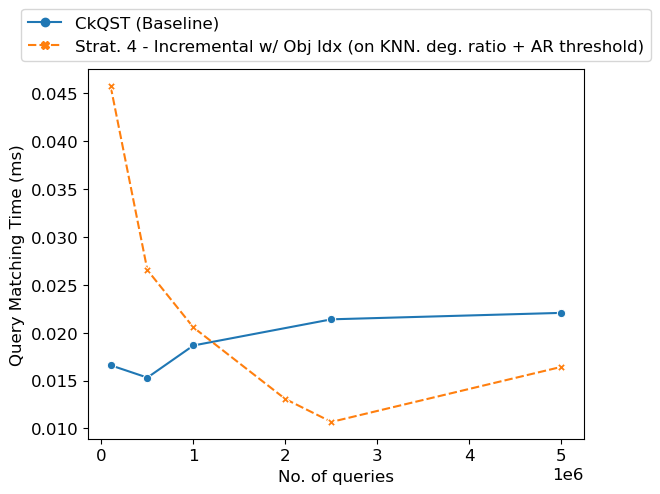

In [7]:
search_res = res.loc[:, ['search_time', 'num_queries', 'name']]
search_res['Query Matching Time (ms)'] = search_res['search_time'].apply(lambda x: x) / (
            search_res['num_queries'] * 1000000)
search_res = search_res.rename(columns={"num_queries": "No. of queries"})
# create_res['experiment'] = create_res['name'].apply(expName)

ax = sns.lineplot(x="No. of queries", y='Query Matching Time (ms)', hue='name', style='name', data=search_res, errorbar=None, markers=True)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1))

In [8]:
# Optimization
# - Custom iterator
# - Circle bound calculation